<a href="https://colab.research.google.com/github/goyalgitesh/colabnotebooks/blob/master/PROJECT_Linear_Regression_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://rhyme.com/assets/img/logo-dark.png" align="center">

<h2 align="center"> Univariate Linear Regression </h2>

### Task 2: Load the Data and Libraries
---

In [0]:
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
%matplotlib inline 

In [2]:
import numpy as np
import pandas as pd  
import seaborn as sns 
plt.rcParams['figure.figsize'] = (12, 8)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
data = pd.read_csv("bike_sharing_data.txt")
data.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   population  97 non-null     float64
 1   profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


### Task 3: Visualize the Data
---

Text(0.5, 1.0, 'profit in $10000s vs city population in 10000s')

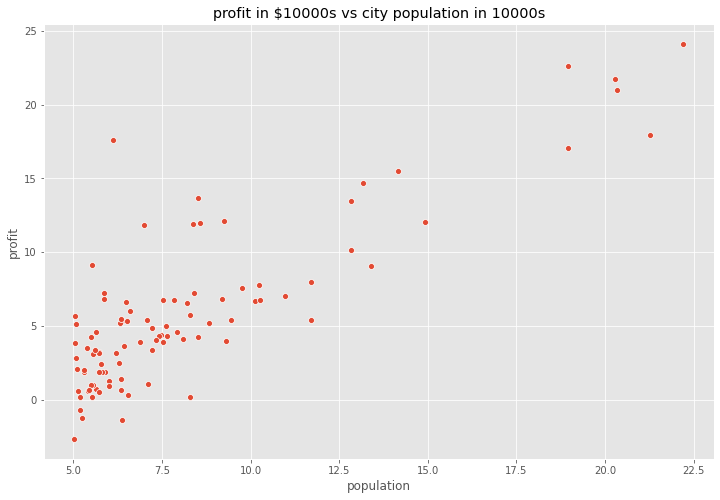

In [5]:
ax = sns.scatterplot(x="population", y="profit",data = data)
ax.set_title("profit in $10000s vs city population in 10000s")

### Task 4: Compute the Cost $J(\theta)$
---

The objective of linear regression is to minimize the cost function

$$J(\theta) = \frac{1}{2m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)} )^2$$

where $h_{\theta}(x)$ is the hypothesis and given by the linear model

$$h_{\theta}(x) = \theta^Tx = \theta_0 + \theta_1x_1$$

In [0]:
def cost_function(x,y,theta):
    m = len(y)
    y_pred = x.dot(theta)
    error = (y_pred - y) ** 2
    return 1 / (2 * m) * np.sum(error)

In [7]:
m = data.population.values.size
x = np.append(np.ones((m,1)), data.population.values.reshape(m,1),axis = 1)
y = data.profit.values.reshape(m,1)
theta = np.zeros((2,1))

cost_function(x,y,theta)

32.072733877455676

### Task 5: Gradient Descent
---

Minimize the cost function $J(\theta)$ by updating the below equation and repeat unitil convergence
        
$\theta_j := \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$ (simultaneously update $\theta_j$ for all $j$).

In [0]:
def gradient_descent(x,y,theta,alpha,iterations):
    m = len(y)
    costs = []
    for i in range(iterations):
        y_pred = x.dot(theta)
        error = np.dot(x.transpose(), (y_pred - y))
        theta -= alpha * 1/m * error
        costs.append(cost_function(x,y,theta))
    return theta,costs
                     

In [9]:
theta, costs = gradient_descent(x,y,theta,alpha = 0.01, iterations = 2000)

print("h(x) = {} + {}x1".format(str(round(theta[0,0],2)),
                               str(round(theta[1,0], 2))))

h(x) = -3.79 + 1.18x1


### Task 6: Visualising the Cost Function $J(\theta)$
---

In [0]:
from mpl_toolkits.mplot3d import Axes3D

In [0]:
theta_0 = np.linspace(-10, 10, 100)
theta_1 = np.linspace(-1, 4, 100)
cost_values = np.zeros((len(theta_0), len(theta_1)))
for i in range(len(theta_0)):
    for j in range(len(theta_1)):
        t = np.array([theta_0[i], theta_1[j]])
        cost_values[i,j] = cost_function(x,y,t)

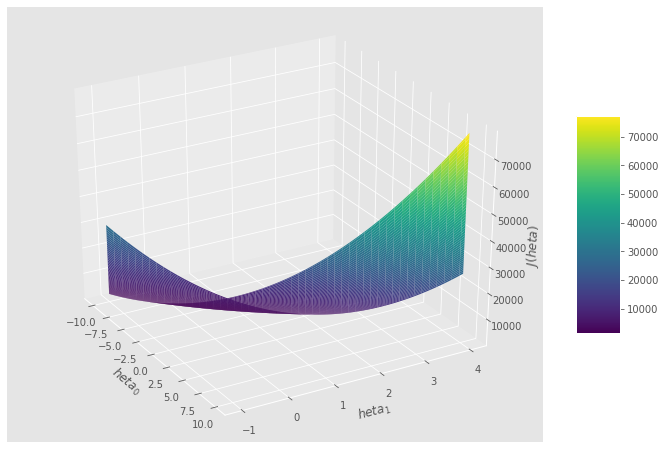

In [12]:
fig = plt.figure(figsize = (12,8))
ax = fig.gca(projection = '3d')
surf = ax.plot_surface(theta_0, theta_1, cost_values, cmap = 'viridis')
fig.colorbar(surf, shrink = 0.5, aspect = 5)
plt.xlabel("$\theta_0$")
plt.ylabel("$\theta_1$")
ax.set_zlabel("$J(\theta)$")
ax.view_init(30,330)

plt.show()

### Task 7: Plotting the Convergence
---

Plot $J(\theta)$ against the number of iterations of gradient descent:

Text(0.5, 1.0, 'values of the cost function over iterations of gradient descent')

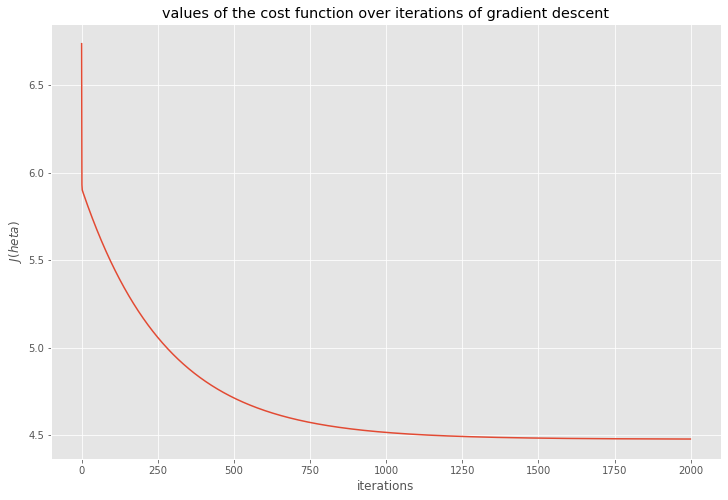

In [13]:
plt.plot(costs)
plt.xlabel("iterations")
plt.ylabel("$J(\theta)$")
plt.title("values of the cost function over iterations of gradient descent")

### Task 8: Training Data with Linear Regression Fit
---

In [14]:
theta.shape

(2, 1)

In [15]:
theta

array([[-3.78806857],
       [ 1.18221277]])

Text(0.5, 1.0, 'linear regression fit')

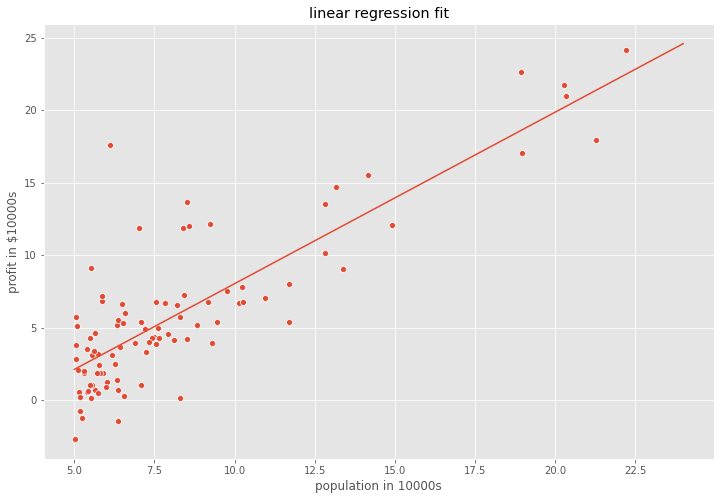

In [16]:
theta = np.squeeze(theta)
sns.scatterplot(x="population", y="profit",data = data)

x_value = [x for x in range(5,25)]
y_value = [(x * theta[1] + theta[0]) for x in x_value]
sns.lineplot(x_value,y_value)
plt.xlabel("population in 10000s")
plt.ylabel("profit in $10000s")
plt.title("linear regression fit")

### Task 9: Inference using the optimized $\theta$ values
---

$h_\theta(x) = \theta^Tx$

In [0]:
def predict(x, theta):
    y_pred = np.dot(theta.transpose(), x)
    return y_pred

In [18]:
y_pred_1 = predict(np.array([1,4]),theta) * 10000
print("for a population of 40000 people,the mode predicts a profit of $" + str(round(y_pred_1,0)))

for a population of 40000 people,the mode predicts a profit of $9408.0


In [19]:
y_pred_2 = predict(np.array([1,8.3]),theta) * 10000
print("for a population of 83000 people,the mode predicts a profit of $" + str(round(y_pred_2,0)))

for a population of 83000 people,the mode predicts a profit of $60243.0
